In [11]:
import pandas as pd

Make sure you use the right version number.

Once installed, we can load the data.

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


Next, we can apply models! 

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [14]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([2.826802, 2.1594  , 3.650404])

Maybe we should inspect the results.

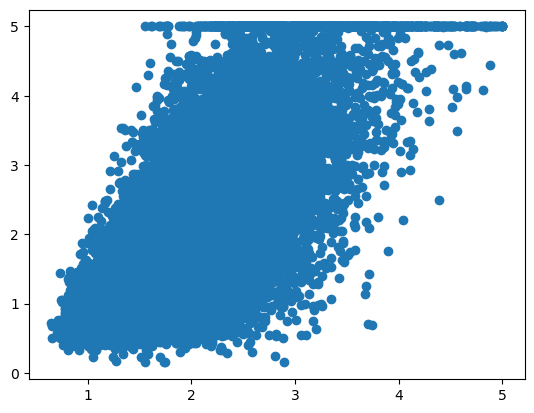

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

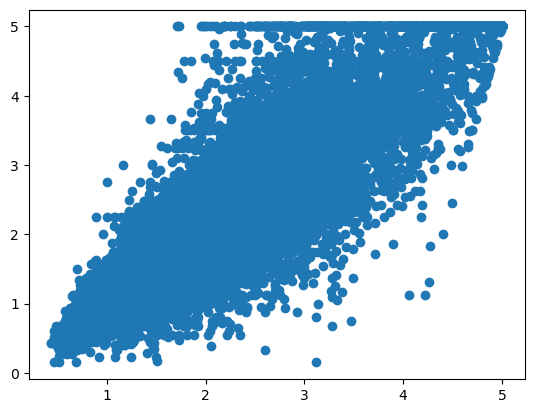

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

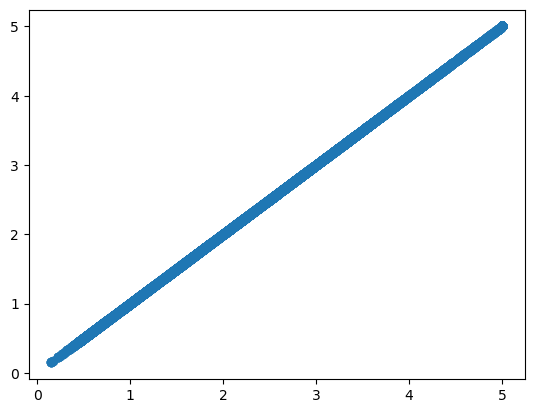

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = fetch_california_housing(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [19]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009502,4.088429e-04,0.153233,0.015100,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.010658,9.505969e-04,0.180379,0.017007,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.010173,2.396808e-04,0.190818,0.015988,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.010100,5.275752e-04,0.201459,0.017345,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.009620,4.415922e-04,0.211255,0.018763,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.010667,4.711457e-04,0.220652,0.023074,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.010336,4.706975e-04,0.224642,0.017696,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.010256,5.381893e-04,0.228176,0.017360,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.010503,4.083344e-04,0.227994,0.016408,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.010001,7.370010e-07,0.238314,0.018917,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


Finally, lets remember that we should look at the data.

In [20]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce